<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Practice day #1: ES models

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Info</h1> 

This practice task is desinged for impriving knowledge of ES models and getting aqcuainted with time series analysis (with python pandas).

The task should take about 3-5 hours to be completed.

<h1 align="center">1. Reading data (10%)</h1>

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)
     - 2) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep36.csv</span> (105 TS of goods sales in shop #36 of one real Retail Net, each TS correspond to an item in shop )
     - 3) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep42.csv</span> (105 TS of goods sales in shop #42 of one real Retail Net, each TS correspond to an item in shop)
     - 4) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">TS_dep6.csv </span>(110 TS of goods sales in shop #6 of one real Retail Net, each TS correspond to an item in shop)
 
 All data you can find by <a href='https://1drv.ms/f/s!AqGgzb5T4tvShZ1-xS0s6FhP5x-05g'>link</a> 
 
 
 * For each data set: 
      - 1) learn it's structure in csv-file and read it into Pandas data frame (be careful with parsing data)
      - 2) plot time series (for data sets with a lot of TS you need to plot integral sales of all items in shop)
      - 3) answer the questions: is there seasonlaity, trend, changes in level in TS? If there is seasonality then define period of seasonality. 

,Real wage
Month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47
1993-06-01,120.65
1993-07-01,116.38
1993-08-01,107.85
1993-09-01,108.93


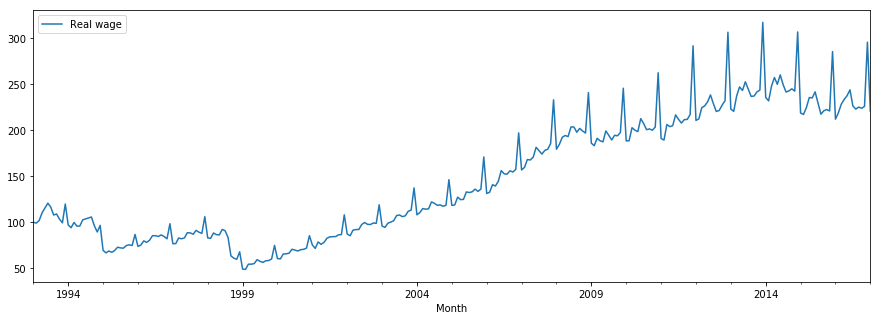

In [514]:
import statsmodels.api as sm
# start with this code
import pandas as pd
import numpy as np
from utils import qualityRMSE, qualityMedianAE
from utils import ExponentialSmoothing

%matplotlib inline


ts = pd.read_csv('monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)

# Put your code below
ts.plot(figsize=(15,5))
ts

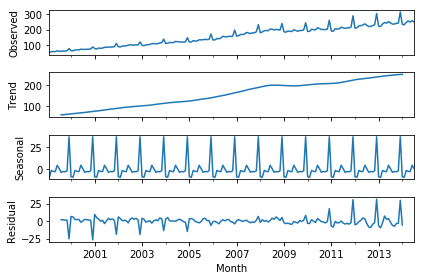

In [59]:
res = sm.tsa.seasonal_decompose(ts['Real wage'].ix['1999-02-01 00:00':'2014-07-01 23:00'].resample('M').mean())
resplot = res.plot()

There is seasonality and its period is 1 year, also I think we have linear trend for the period from 1999 to 2014

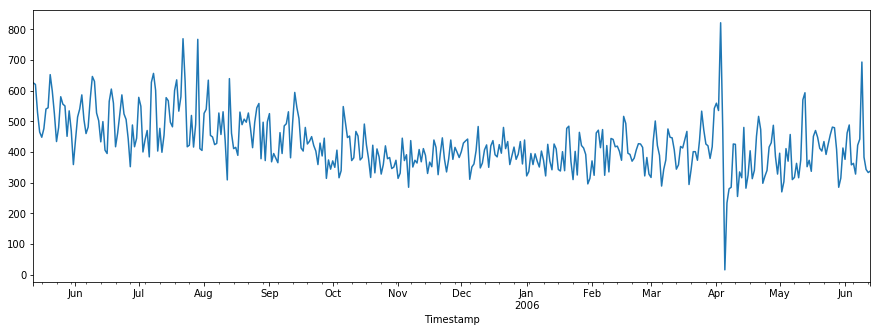

In [70]:
ts = pd.read_csv('TS_dep36.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)

# Put your code below
ts.sum(axis = 1).plot(figsize=(15,5))
ts = ts.sum(axis = 1)

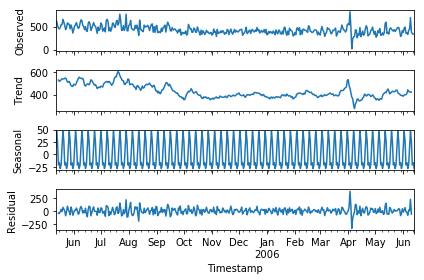

In [79]:
res = sm.tsa.seasonal_decompose(ts.resample('D').mean())
resplot = res.plot()

There is seasonality and its period is 1 day, no trend

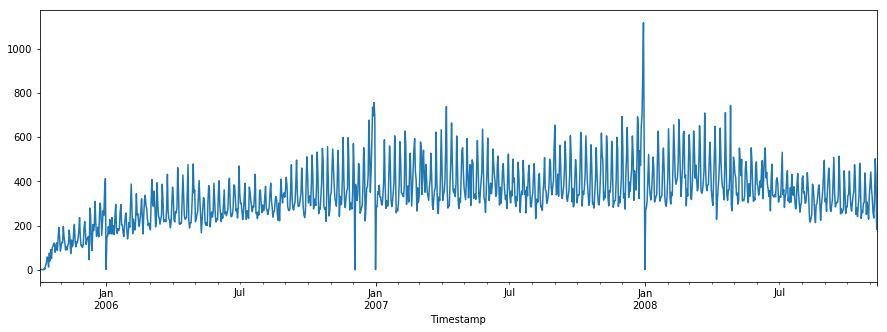

In [80]:
ts = pd.read_csv('TS_dep42.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)

ts.sum(axis = 1).plot(figsize=(15,5))
ts = ts.sum(axis = 1)

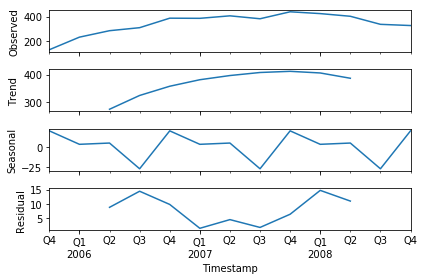

In [83]:
res = sm.tsa.seasonal_decompose(ts.resample('Q').mean())
resplot = res.plot()

There is seasonality for year, also day, maybe linear trend

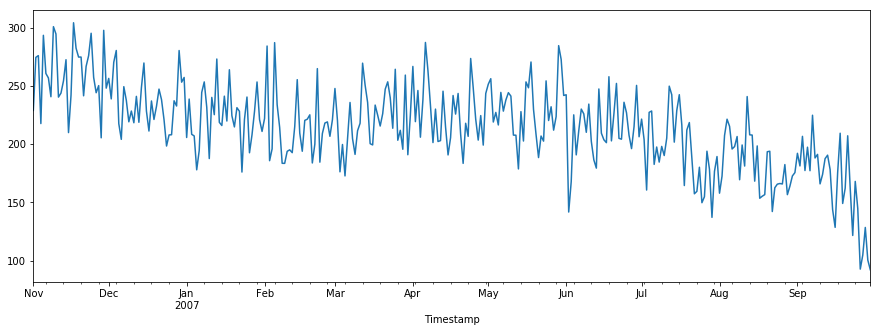

In [84]:
ts = pd.read_csv('TS_dep6.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)

ts.sum(axis = 1).plot(figsize=(15,5))
ts = ts.sum(axis = 1)

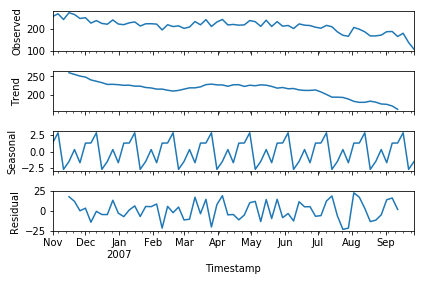

In [101]:
res = sm.tsa.seasonal_decompose(ts.resample('5D').mean())
resplot = res.plot()

There is seasonality for month, also day, linear decreasing trend

<h1 align="center">2. Apply Simple ES to data with trend and Seasonality (15%) </h1>
You need to apply SES (IES see seminar 2) model for TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

 * 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You can choose any loss function from seminar 2).
 * 2) Draw forecast with optimial value $\alpha$ for data from 09.1998 to 01.2017. Conclude whether SES can be used for this TS? If can not than explain why.
 * 3) Calculate accuracy of the forecast of TS in [02.2016, 01.2017].
 * 4) Aggregate original TS by Years (time step should be 1 year). Repeat point 1)-2) for aggregated TS.

In [263]:
def qualityMAPE(x,y):
    qlt = ((x-y).abs()/x).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

In [264]:
def SimpleExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        return FORECAST
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = y*(1-alpha) + alpha*x[cntr]
        FORECAST[cntr+h] = y
    return FORECAST

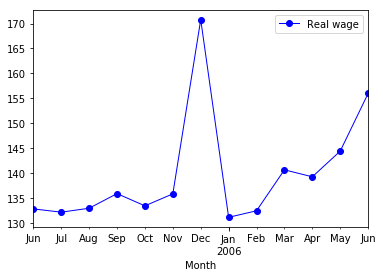

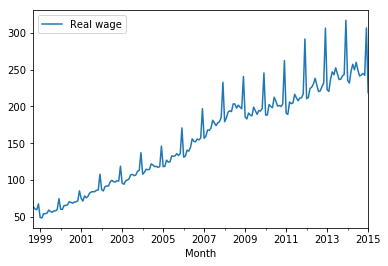

In [322]:
# put your code here
ts = pd.read_csv('monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)
orig_ts = ts
# Example: draw of ts and it's forecast 
ts.loc['2005-05-12':'2006-06-10'].plot(style='b', linewidth=1.0, marker='o')

ts1 = ts.loc['1998-09-01':'2015-01-01']
ts1.plot()

In [323]:
import matplotlib.pyplot as plt
import math as math
from datetime import datetime, timedelta

In [324]:
h = 1
ALPHA = [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8,0.95]
FRC_TS = dict()

for alpha in ALPHA:
    frc_ts = pd.DataFrame(index = ts1.index.append(pd.date_range(ts1.index[-1]+timedelta(1), ts1.index[-1]+timedelta(h)))
                          , columns = ts.columns)
    for cntr in ts.columns:
        frc_ts[cntr] = SimpleExponentialSmoothing(ts1[cntr], h, {'alpha':alpha})
    FRC_TS['SES alpha %.2f' % alpha] = frc_ts

In [326]:
# compare ES parameters
QualityStr = pd.DataFrame(index = ts1.columns, columns = FRC_TS.keys())

ix = range(len(ts1.index))

for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts1.ix[ix], frc_ts.ix[ix])

QualityStr

,SES alpha 0.95,SES alpha 0.50,SES alpha 0.35,SES alpha 0.80,SES alpha 0.60,SES alpha 0.40,SES alpha 0.70,SES alpha 0.10,SES alpha 0.30,SES alpha 0.25,SES alpha 0.20
Real wage,0.062807,0.056395,0.054423,0.061313,0.058214,0.054766,0.059967,0.077522,0.054645,0.055649,0.057802


for our time period best alpha seems to be 0.35 for our loss, its close to both 0 and 1, so SES can be used for our TS, but will give not very good results

In [270]:
ts = ts.loc['1998-09-01':]
# ES params
Params ={'alpha':0.35}
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_f = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts_f[cntr] = SimpleExponentialSmoothing(x, h, Params)

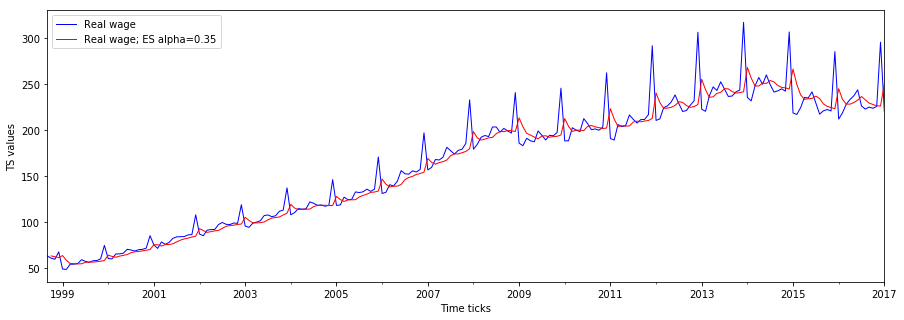

In [278]:
# show forecast alpha = 0.35
frc_ts_f.columns = ts.columns+'; ES alpha=0.35'
ts_num = 0 

ts[ts.columns[ts_num]].plot(style='b', linewidth=1.0)
frc_ts_f[frc_ts_f.columns[ts_num]].plot(c = "r", figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

So, 0.35 alpha can be used for this TS, it works for level but fails for seasonality

In [291]:
# error from 2015 to 2017
ix = range(len(ts.index))
qualityMAPE(ts.loc['2015-01-01':]['Real wage'], frc_ts_f.loc['2015-01-01':]['Real wage; ES alpha=0.35'])[0]

0.067563728029695

so error in region where we did not optimised our alpha error is higher

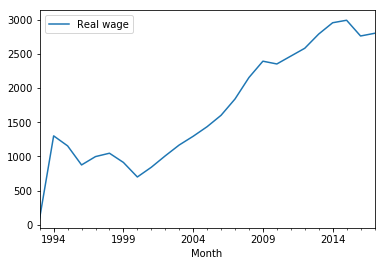

In [511]:
# aggregate the ts
ts1 = orig_ts.resample('12M').sum()
ts1.plot()
ts1 = ts1.loc['1998-09-01':'2015-01-01']

In [512]:
h = 1
ALPHA = [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
FRC_TS = dict()

for alpha in ALPHA:
    frc_ts = pd.DataFrame(index = ts1.index.append(pd.date_range(ts1.index[-1]+timedelta(1), ts1.index[-1]+timedelta(h)))
                          , columns = ts.columns)
    for cntr in ts.columns:
        frc_ts[cntr] = SimpleExponentialSmoothing(ts1[cntr], h, {'alpha':alpha})
    FRC_TS['SES alpha %.2f' % alpha] = frc_ts

# compare ES parameters
QualityStr = pd.DataFrame(index = ts1.columns, columns = FRC_TS.keys())

ix = range(len(ts1.index))

for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts1.iloc[ix], frc_ts.iloc[ix])

QualityStr

,SES alpha 0.50,SES alpha 0.35,SES alpha 0.80,SES alpha 0.60,SES alpha 0.20,SES alpha 0.10,SES alpha 0.40,SES alpha 0.90,SES alpha 0.95,SES alpha 0.70,SES alpha 0.30,SES alpha 0.25
Real wage,0.163693,0.200079,0.124944,0.147323,0.267236,0.339714,0.185872,0.117716,0.115093,0.134809,0.218176,0.240441


for aggregated time series alpha=0.95 seems to be best

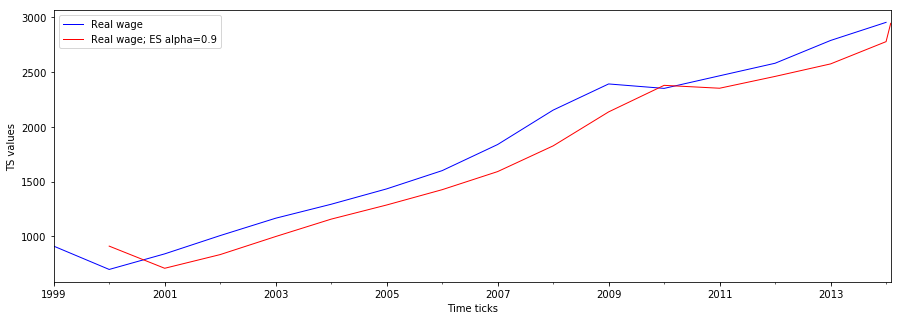

In [513]:
ts = ts1.loc['1998-09-01':]
# ES params
Params ={'alpha':0.95}
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_f = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts_f[cntr] = SimpleExponentialSmoothing(x, h, Params)

# show forecast alpha = 0.9
frc_ts_f.columns = ts.columns+'; ES alpha=0.9'
ts_num = 0 

ts[ts.columns[ts_num]].plot(style='b', linewidth=1.0)
frc_ts_f[frc_ts_f.columns[ts_num]].plot(c = "r", figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

<h1 align="center">3. Winters model for Additive Seasonality (25%) </h1>
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of SES: is it better? 
* \*5) Conclude whether Winter's ES can be used for this TS?

In [629]:
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= x[0]
    s= [0]* (p)

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
            
            if math.isnan(s[cntr % p]):
                s[cntr % p] = s([(cntr-1)%p])
            l_old = l
            l = l*(1-alpha) + alpha*(x[cntr]-s[cntr % p])
            s[cntr % p] = (1-delta)*s[cntr % p] + delta *(x[cntr]-l_old)
            
        FORECAST[cntr+h] = l + s[(cntr+h)% p]
    return FORECAST

In [630]:
# Put your code here
ts = orig_ts
# Example: run forecast:
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
#  Quality = [np.NaN]*len(ts)
for cntr in ts.columns:
    w_frc_ts[cntr] = WintersExponentialSmoothing(ts[cntr], h, {'alpha':0.1, 'delta': 0.5, 'seasonality_period': 12})

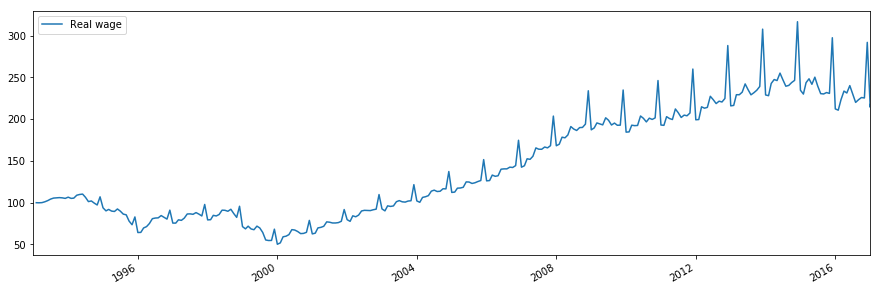

In [631]:
w_frc_ts.plot(figsize=(15,5))

In [537]:
# lets take data from 1998 to 2015
ts1 = ts.loc['1998-09-01':'2015-01-01']

h = 1
ALPHA = [{'alpha':0.1, 'delta': 0.1, 'seasonality_period': 12},
        {'alpha':0.55, 'delta': 0.91, 'seasonality_period': 12},
        {'alpha':0.9, 'delta': 0.1, 'seasonality_period': 12},
        {'alpha':0.1, 'delta': 0.3, 'seasonality_period': 12},
        {'alpha':0.5, 'delta': 0.3, 'seasonality_period': 12},
        {'alpha':0.9, 'delta': 0.3, 'seasonality_period': 12},
        {'alpha':0.1, 'delta': 0.9, 'seasonality_period': 12},
        {'alpha':0.5, 'delta': 0.99, 'seasonality_period': 12},
        {'alpha':0.9, 'delta': 0.9, 'seasonality_period': 12},
        {'alpha':0.1, 'delta': 0.95, 'seasonality_period': 12},
        {'alpha':0.6, 'delta': 0.9, 'seasonality_period': 12},
         {'alpha':0.3, 'delta': 0.7, 'seasonality_period': 12},
         {'alpha':0.35, 'delta': 0.9, 'seasonality_period': 12},
         {'alpha':0.4, 'delta': 0.9, 'seasonality_period': 12},
        {'alpha':0.5, 'delta': 0.95, 'seasonality_period': 12}]
FRC_TS = dict()

for alpha in ALPHA:
    frc_ts = pd.DataFrame(index = ts1.index.append(pd.date_range(ts1.index[-1]+timedelta(1), ts1.index[-1]+timedelta(h)))
                          , columns = ts.columns)
    for cntr in ts.columns:
        frc_ts[cntr] = WintersExponentialSmoothing(ts1[cntr], h, alpha)
    FRC_TS[str(alpha)] = frc_ts

# compare ES parameters
QualityStr = pd.DataFrame(index = ts1.columns, columns = FRC_TS.keys())

ix = range(len(ts1.index))

for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts1.iloc[ix], frc_ts.iloc[ix])

QualityStr.T

,Real wage
"{'seasonality_period': 12, 'alpha': 0.55, 'delta': 0.91}",0.024165
"{'seasonality_period': 12, 'alpha': 0.9, 'delta': 0.3}",0.054298
"{'seasonality_period': 12, 'alpha': 0.1, 'delta': 0.3}",0.063498
"{'seasonality_period': 12, 'alpha': 0.6, 'delta': 0.9}",0.024810
"{'seasonality_period': 12, 'alpha': 0.9, 'delta': 0.1}",0.059402
"{'seasonality_period': 12, 'alpha': 0.5, 'delta': 0.95}",0.024029
"{'seasonality_period': 12, 'alpha': 0.4, 'delta': 0.9}",0.025443
"{'seasonality_period': 12, 'alpha': 0.1, 'delta': 0.9}",0.053820
"{'seasonality_period': 12, 'alpha': 0.9, 'delta': 0.9}",0.042343
"{'seasonality_period': 12, 'alpha': 0.5, 'delta': 0.99}",0.023951


for ses with seasonality alpha = 0.5 seems to be the best, delta = 0.95

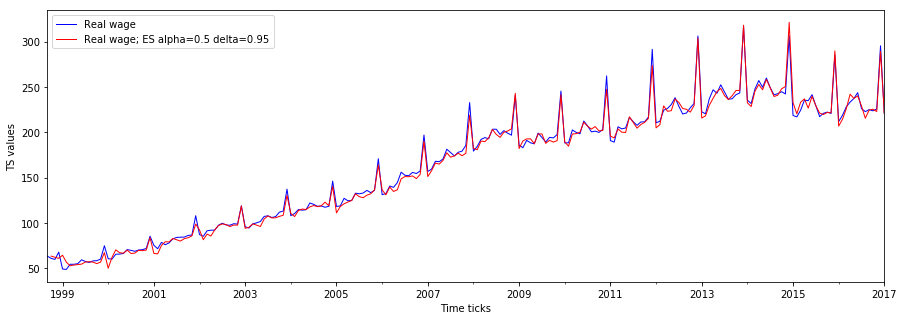

In [632]:
ts = orig_ts.loc['1998-09-01':]
# ES params
Params ={'alpha':0.5, 'delta': 0.95, 'seasonality_period': 12}
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_f = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts_f[cntr] = WintersExponentialSmoothing(x, h, Params)

# show forecast alpha = 0.35
frc_ts_f.columns = ts.columns+'; ES alpha=0.5 delta=0.95'
ts_num = 0 

ts[ts.columns[ts_num]].plot(style='b', linewidth=1.0)
frc_ts_f[frc_ts_f.columns[ts_num]].plot(c = "r", figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [633]:
# error from 2015 to 2017
ix = range(len(ts.index))
qualityMAPE(ts.loc['2015-01-01':]['Real wage'], frc_ts_f.loc['2015-01-01':]['Real wage; ES alpha=0.5 delta=0.95'])[0]

0.016419363714359123

we get 0.018 enstead of 0.67, so it is better

winters additive method seems to be useful for our TS

<h2 align="left">4. Theil-Wage model for TS with linear trend and seasonality (25%)</h2>
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for (use code from seminar 2 as example)
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [634]:
def WageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    beta = Params['beta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= x[0]
    b = 0
    s= [0]* (p)

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
            
            if math.isnan(s[cntr % p]):
                s[cntr % p] = s([(cntr-1)%p])
            l_old = l
            l = (l+b)*(1-alpha) + alpha*(x[cntr]-s[cntr % p])
            b = beta * (l-l_old) + (1-beta) * b
            s[cntr % p] = (1-delta)*s[cntr % p] + delta *(x[cntr]-l)
            
        FORECAST[cntr+h] = l+ b + s[(cntr+h)% p]
    return FORECAST

In [618]:
# Put your code here
ts = orig_ts
# Example: run forecast:
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
#  Quality = [np.NaN]*len(ts)
for cntr in ts.columns:
    w_frc_ts[cntr] = WageExponentialSmoothing(ts[cntr], h, {'alpha':0.3, 'delta': 0.95, 'beta': 0.1, 'seasonality_period': 12})

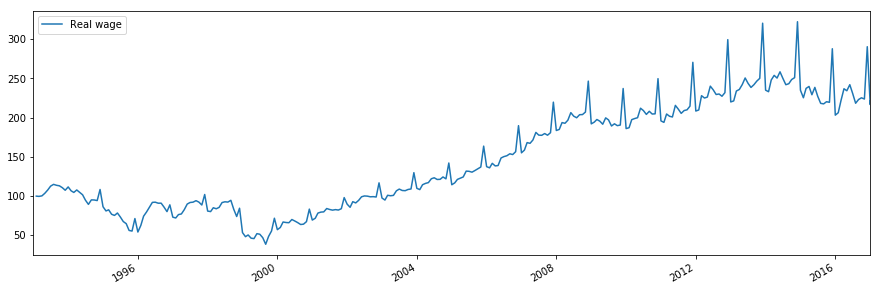

In [619]:
w_frc_ts.plot(figsize=(15,5))

In [620]:
# lets take data from 1998 to 2015
ts1 = ts.loc['1998-09-01':'2015-01-01']

h = 1
ALPHA = [{'alpha':0.3, 'delta': 0.95, 'seasonality_period': 12, 'beta': 0.2},
        {'alpha':0.3, 'delta': 0.95, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.3, 'delta': 0.95, 'seasonality_period': 12, 'beta': 0.2},
        {'alpha':0.4, 'delta': 0.9, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.5, 'delta': 0.9, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.6, 'delta': 0.9, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.7, 'delta': 0.9, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.8, 'delta': 0.9, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.9, 'delta': 0.9, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.3, 'delta': 0.5, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.2, 'delta': 0.5, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.1, 'delta': 0.5, 'seasonality_period': 12, 'beta': 0.1}]
FRC_TS = dict()

for alpha in ALPHA:
    frc_ts = pd.DataFrame(index = ts1.index.append(pd.date_range(ts1.index[-1]+timedelta(1), ts1.index[-1]+timedelta(h)))
                          , columns = ts.columns)
    for cntr in ts.columns:
        frc_ts[cntr] = WintersExponentialSmoothing(ts1[cntr], h, alpha)
    FRC_TS[str(alpha)] = frc_ts

# compare ES parameters
QualityStr = pd.DataFrame(index = ts1.columns, columns = FRC_TS.keys())

ix = range(len(ts1.index))

for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts1.iloc[ix], frc_ts.iloc[ix])

QualityStr.T

,Real wage
"{'seasonality_period': 12, 'alpha': 0.3, 'delta': 0.95, 'beta': 0.2}",0.029616
"{'seasonality_period': 12, 'alpha': 0.5, 'delta': 0.9, 'beta': 0.1}",0.024150
"{'seasonality_period': 12, 'alpha': 0.8, 'delta': 0.9, 'beta': 0.1}",0.031980
"{'seasonality_period': 12, 'alpha': 0.6, 'delta': 0.9, 'beta': 0.1}",0.024810
"{'seasonality_period': 12, 'alpha': 0.4, 'delta': 0.9, 'beta': 0.1}",0.025443
"{'seasonality_period': 12, 'alpha': 0.9, 'delta': 0.9, 'beta': 0.1}",0.042343
"{'seasonality_period': 12, 'alpha': 0.2, 'delta': 0.5, 'beta': 0.1}",0.039367
"{'seasonality_period': 12, 'alpha': 0.3, 'delta': 0.95, 'beta': 0.1}",0.029616
"{'seasonality_period': 12, 'alpha': 0.7, 'delta': 0.9, 'beta': 0.1}",0.027114
"{'seasonality_period': 12, 'alpha': 0.3, 'delta': 0.5, 'beta': 0.1}",0.030637


we will pick alpha = 0.5, gamma = 0.95, beta = 0.1


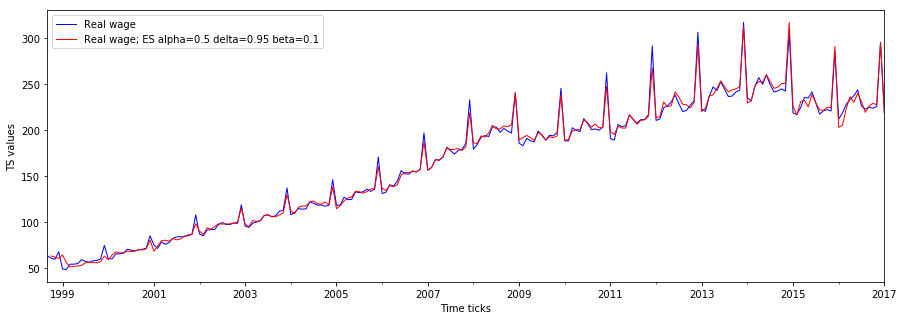

In [637]:
ts = orig_ts.loc['1998-09-01':]
# ES params
Params ={'alpha':0.5, 'delta': 0.95, 'seasonality_period': 12, 'beta': 0.1}
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_f = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts_f[cntr] = WageExponentialSmoothing(x, h, Params)


frc_ts_f.columns = ts.columns+'; ES alpha=0.5 delta=0.95 beta=0.1'
ts_num = 0 

ts[ts.columns[ts_num]].plot(style='b', linewidth=1.0)
frc_ts_f[frc_ts_f.columns[ts_num]].plot(c = "r", figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [638]:
# error from 2015 to 2017
ix = range(len(ts.index))
qualityMAPE(ts.loc['2015-01-01':]['Real wage'], frc_ts_f.loc['2015-01-01':]['Real wage; ES alpha=0.5 delta=0.95 beta=0.1'])[0]

0.018671043013523344

this model seems to change nothing for our case, it works like Winter's

<h2 align="left"> 5. Non-additive model of ES (25%)</h2>
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it expetrly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2016, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diver

In [680]:
def MultiplicativeExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    beta = Params['beta']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= x[0]
    r = 1
    s= [1]* (p)

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[cntr]
            
            if math.isnan(s[cntr % p]):
                s[cntr % p] = s([(cntr-1)%p])
            
            l_old = l
            l = (l*r)*(1-alpha) + alpha*(x[cntr]/s[cntr % p])
            r = beta * (l/l_old) + (1-beta) * r
            s[cntr % p] = (1-delta)*s[cntr % p] + delta *(x[cntr]/l)
            
        FORECAST[cntr+h] = l*r * s[(cntr+h)% p]
    return FORECAST

In [681]:
# Put your code here
ts = orig_ts
# Example: run forecast:
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

w_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
#  Quality = [np.NaN]*len(ts)
for cntr in ts.columns:
    w_frc_ts[cntr] = MultiplicativeExponentialSmoothing(ts[cntr], h, {'alpha':0.3, 'delta': 0.95, 'beta': 0.1, 'seasonality_period': 12})

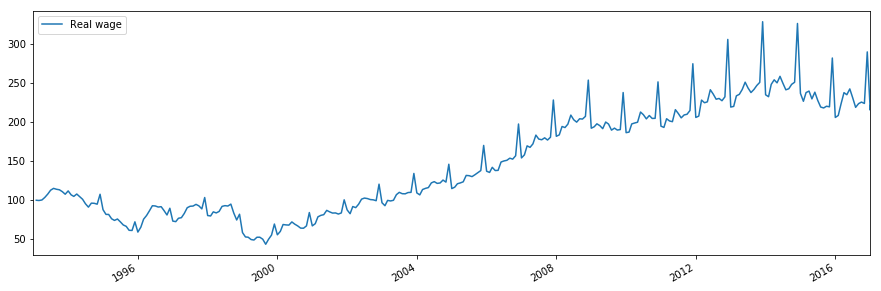

In [682]:
w_frc_ts.plot(figsize=(15,5))

In [697]:
# lets take data from 1998 to 2015
ts1 = ts.loc['1998-09-01':'2015-01-01']

h = 1
ALPHA = [{'alpha':0.3, 'delta': 0.95, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.3, 'delta': 0.95, 'seasonality_period': 12, 'beta': 0.2},
        {'alpha':0.3, 'delta': 0.95, 'seasonality_period': 12, 'beta': 0.3},
        {'alpha':0.3, 'delta': 0.95, 'seasonality_period': 12, 'beta': 0.4},
        {'alpha':0.3, 'delta': 0.5, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.2, 'delta': 0.9, 'seasonality_period': 12, 'beta': 0.1},
        {'alpha':0.3, 'delta': 0.5, 'seasonality_period': 12, 'beta': 0.3},
        {'alpha':0.05, 'delta': 0.5, 'seasonality_period': 12, 'beta': 0.9},]
FRC_TS = dict()

for alpha in ALPHA:
    frc_ts = pd.DataFrame(index = ts1.index.append(pd.date_range(ts1.index[-1]+timedelta(1), ts1.index[-1]+timedelta(h)))
                          , columns = ts.columns)
    for cntr in ts.columns:
        frc_ts[cntr] = MultiplicativeExponentialSmoothing(ts1[cntr], h, alpha)
    FRC_TS[str(alpha)] = frc_ts

# compare ES parameters
QualityStr = pd.DataFrame(index = ts1.columns, columns = FRC_TS.keys())

ix = range(len(ts1.index))

for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts1.iloc[ix], frc_ts.iloc[ix])

QualityStr.T

,Real wage
"{'seasonality_period': 12, 'alpha': 0.3, 'delta': 0.95, 'beta': 0.2}",0.027011
"{'seasonality_period': 12, 'alpha': 0.3, 'delta': 0.5, 'beta': 0.3}",0.026161
"{'seasonality_period': 12, 'alpha': 0.3, 'delta': 0.95, 'beta': 0.3}",0.034574
"{'seasonality_period': 12, 'alpha': 0.3, 'delta': 0.95, 'beta': 0.4}",0.091392
"{'seasonality_period': 12, 'alpha': 0.3, 'delta': 0.95, 'beta': 0.1}",0.024287
"{'seasonality_period': 12, 'alpha': 0.05, 'delta': 0.5, 'beta': 0.9}",0.058515
"{'seasonality_period': 12, 'alpha': 0.3, 'delta': 0.5, 'beta': 0.1}",0.023306
"{'seasonality_period': 12, 'alpha': 0.2, 'delta': 0.9, 'beta': 0.1}",0.027827


it seems to have lower loss in training region, parameters are 'alpha':0.35, 'delta': 0.7, 'seasonality_period': 12, 'beta': 0.05

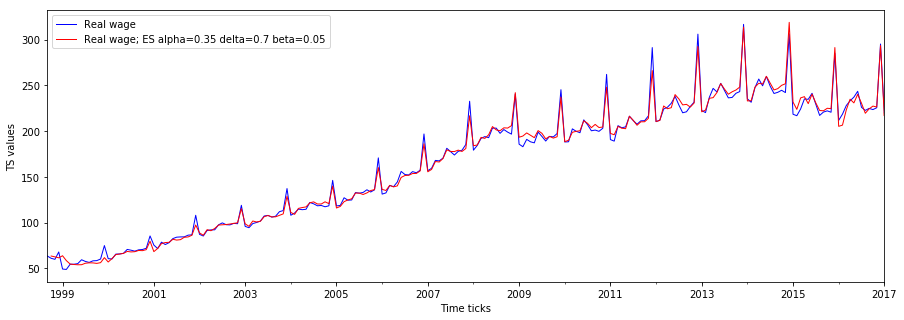

In [684]:
ts = orig_ts.loc['1998-09-01':]
# ES params
Params ={'alpha':0.35, 'delta': 0.7, 'seasonality_period': 12, 'beta': 0.05}
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts_f = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts_f[cntr] = WageExponentialSmoothing(x, h, Params)

# show forecast alpha = 0.35
frc_ts_f.columns = ts.columns+'; ES alpha=0.35 delta=0.7 beta=0.05'
ts_num = 0 

ts[ts.columns[ts_num]].plot(style='b', linewidth=1.0)
frc_ts_f[frc_ts_f.columns[ts_num]].plot(c = "r", figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [685]:
# error from 2015 to 2017
ix = range(len(ts.index))
qualityMAPE(ts.loc['2015-01-01':]['Real wage'], frc_ts_f.loc['2015-01-01':]['Real wage; ES alpha=0.35 delta=0.7 beta=0.05'])[0]

0.020222410714731104

this model seems to not chnage much error from 2015 to 2017
